[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
n: 10
b: 20


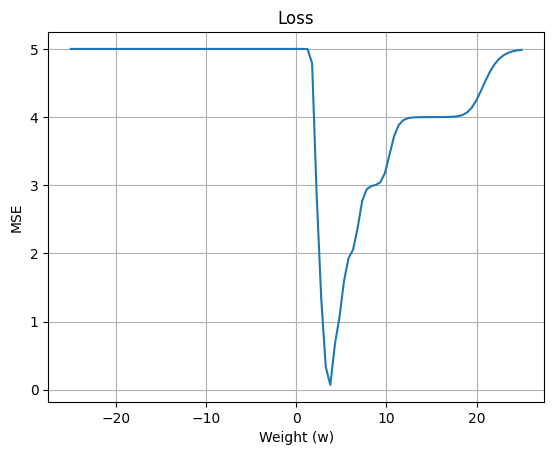

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random


def sigmoid(w, x, b):
  return 1 / (1 + np.exp(-w*x + b))

def linear(w, x, b):
  return w*x + b


def get_activation(activation):

    if activation=='linear':
        return linear

    elif activation=='sigmoid':
         return sigmoid

    else:
        raise ValueError(f"Unsupported activation: {activation}")


def simulate_loss(problem, activation, lossfunc, n,  w_values, b):

    X = []
    Y = []
    results = []

    # -----------------------
    # Creazione datase fake
    # ----------------------

    for i in range(1, n+1):

        if problem=='linear':
          x = i*1
          y = 2*x

        elif problem=='binary_classification':
          scale = 1
          x = i*scale
          #y = 1 if x**2 - (n/2)**2 > 0 else 0
          y = 0 if x <= (n/2)*scale else 1

        else:
          raise ValueError(f"Unsupported problem: {problem}")

        X.append( x )
        Y.append( y )


    print(X)
    print(Y)

    # -----------------------
    # Funzione di costo
    # ----------------------

    act = get_activation(activation)

    for w in w_values:


        if lossfunc=='mse':
          loss = sum(  ( y - act(w, x, b) )**2 for x, y in zip(X, Y) )


        elif lossfunc == 'bce':
            epsilon = 1e-10  # Small epsilon value to avoid math domain error
            loss = sum(-y * math.log(max(min(act(w, x, b), 1-1e-15), 1e-15)) - (1 - y) * math.log(max(min(1 - act(w, x, b), 1-1e-15), 1e-15)) for x, y in zip(X, Y))


        else:
          raise ValueError(f"Unsupported loss function: {lossfunc}")


        results.append( (w, loss) )


    return results

b = random.uniform(0, 100)
b=20
dataset_len = 10


# linear | binary_classification
problem = 'binary_classification'

# linear | sigmoid
activation = 'sigmoid'

# mse | bce
lossfunc = 'mse'

w_values = np.linspace(-25, 25, 100)


results = simulate_loss(problem=problem, activation=activation, lossfunc=lossfunc, n=dataset_len, w_values=w_values, b=b)

weights, losses = zip(*results)


print (f'n: {dataset_len}')
print (f'b: {b}')

plt.plot(weights, losses)
plt.xlabel('Weight (w)')
plt.ylabel('MSE')
plt.title('Loss')
plt.grid(True)
plt.show()

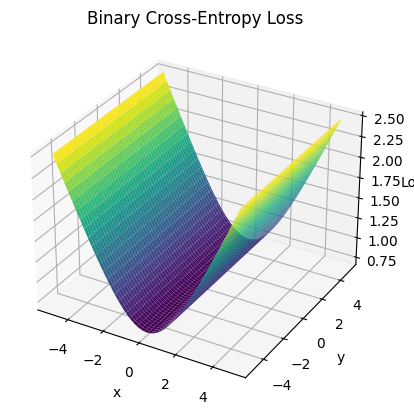

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-7
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Generate data points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Compute loss values for each data point
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = binary_cross_entropy(np.array([0, 1]), sigmoid(X[i, j]))

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Loss')
ax.set_title('Binary Cross-Entropy Loss')
plt.show()
